In [2]:
# import pandas after a reset
import pandas as pd
import numpy as np 

#load each hourly dataset
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('hourlyIntensities_merged.csv')

In [3]:
# Inspect the first few rows and the column names of each dataset
datasets = [hourly_steps, hourly_calories, hourly_intensities]
dataset_names = ['hourly_steps', 'hourly_calories','hourly_intensities']

for name, dataset in zip(dataset_names, datasets):
    print(f"{name.upper()}:")
    print(dataset.head())
    print(dataset.columns.tolist())
    print("\n")

HOURLY_STEPS:
           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0
['Id', 'ActivityHour', 'StepTotal']


HOURLY_CALORIES:
           Id           ActivityHour  Calories
0  1503960366  4/12/2016 12:00:00 AM        81
1  1503960366   4/12/2016 1:00:00 AM        61
2  1503960366   4/12/2016 2:00:00 AM        59
3  1503960366   4/12/2016 3:00:00 AM        47
4  1503960366   4/12/2016 4:00:00 AM        48
['Id', 'ActivityHour', 'Calories']


HOURLY_INTENSITIES:
           Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
3  1503960366   4/12

In [4]:
print(hourly_steps.shape)
print(hourly_calories.shape)
print(hourly_intensities.shape)

(22099, 3)
(22099, 3)
(22099, 4)


In [5]:
# Merge datasets: Start with hourly_steps as the base, then merge others one by one
# Using an outer join to ensure no data is missed
hourly_merged_data = hourly_steps.merge(hourly_calories, on=['Id', 'ActivityHour'], how='outer', suffixes=('', '_calories'))

# Merging hourly_intensities
hourly_merged_data = hourly_merged_data.merge(hourly_intensities, on=['Id', 'ActivityHour'], how='outer', suffixes=('', '_intensities'))

# Check for duplicates based on Id and ActivityDay
duplicates = hourly_merged_data.duplicated(subset=['Id', 'ActivityHour'], keep='first').sum()

# Overview of the merged dataset
merged_overview = {
    'Number of rows': hourly_merged_data.shape[0],
    'Number of columns': hourly_merged_data.shape[1],
    'Number of duplicates': duplicates
}

print(merged_overview)
hourly_merged_data.head()

{'Number of rows': 22099, 'Number of columns': 6, 'Number of duplicates': 0}


,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,373,81,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,160,61,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,151,59,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,47,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,48,0,0.000000


In [6]:
# Define a function to split the ActivityHour column into ActivityDay and ActivityTime
def split_activity_hour(df, column_name='ActivityHour'):
    # Split the column into two parts: Date and Time
    split_columns = df[column_name].str.split(' ', expand=True)
    # Assign the split columns to the dataframe
    df['ActivityDay'] = pd.to_datetime(split_columns[0])  # Convert to datetime format
    df['ActivityTime'] = split_columns[1]
    # Drop the original ActivityHour column
    df.drop(column_name, axis=1, inplace=True)
    return df

In [7]:
# Apply the function to each dataset
hourly_merged_data = split_activity_hour(hourly_merged_data)

In [22]:
hourly_merged_data.to_csv("hourly_merged_data.csv")

In [23]:
hourly_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   StepTotal         22099 non-null  int64         
 2   Calories          22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
 5   ActivityDay       22099 non-null  datetime64[ns]
 6   ActivityTime      22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [24]:
hourly_merged_data.isnull().sum()

Id                  0
StepTotal           0
Calories            0
TotalIntensity      0
AverageIntensity    0
ActivityDay         0
ActivityTime        0
dtype: int64

In [25]:
hourly_activity_EDA = pd.read_csv("hourly_merged_data.csv", index_col=0)
hourly_activity_EDA.head()

,Id,StepTotal,Calories,TotalIntensity,AverageIntensity,ActivityDay,ActivityTime
0,1503960366,373,81,20,0.333333,2016-04-12,12:00:00
1,1503960366,160,61,8,0.133333,2016-04-12,1:00:00
2,1503960366,151,59,7,0.116667,2016-04-12,2:00:00
3,1503960366,0,47,0,0.000000,2016-04-12,3:00:00
4,1503960366,0,48,0,0.000000,2016-04-12,4:00:00


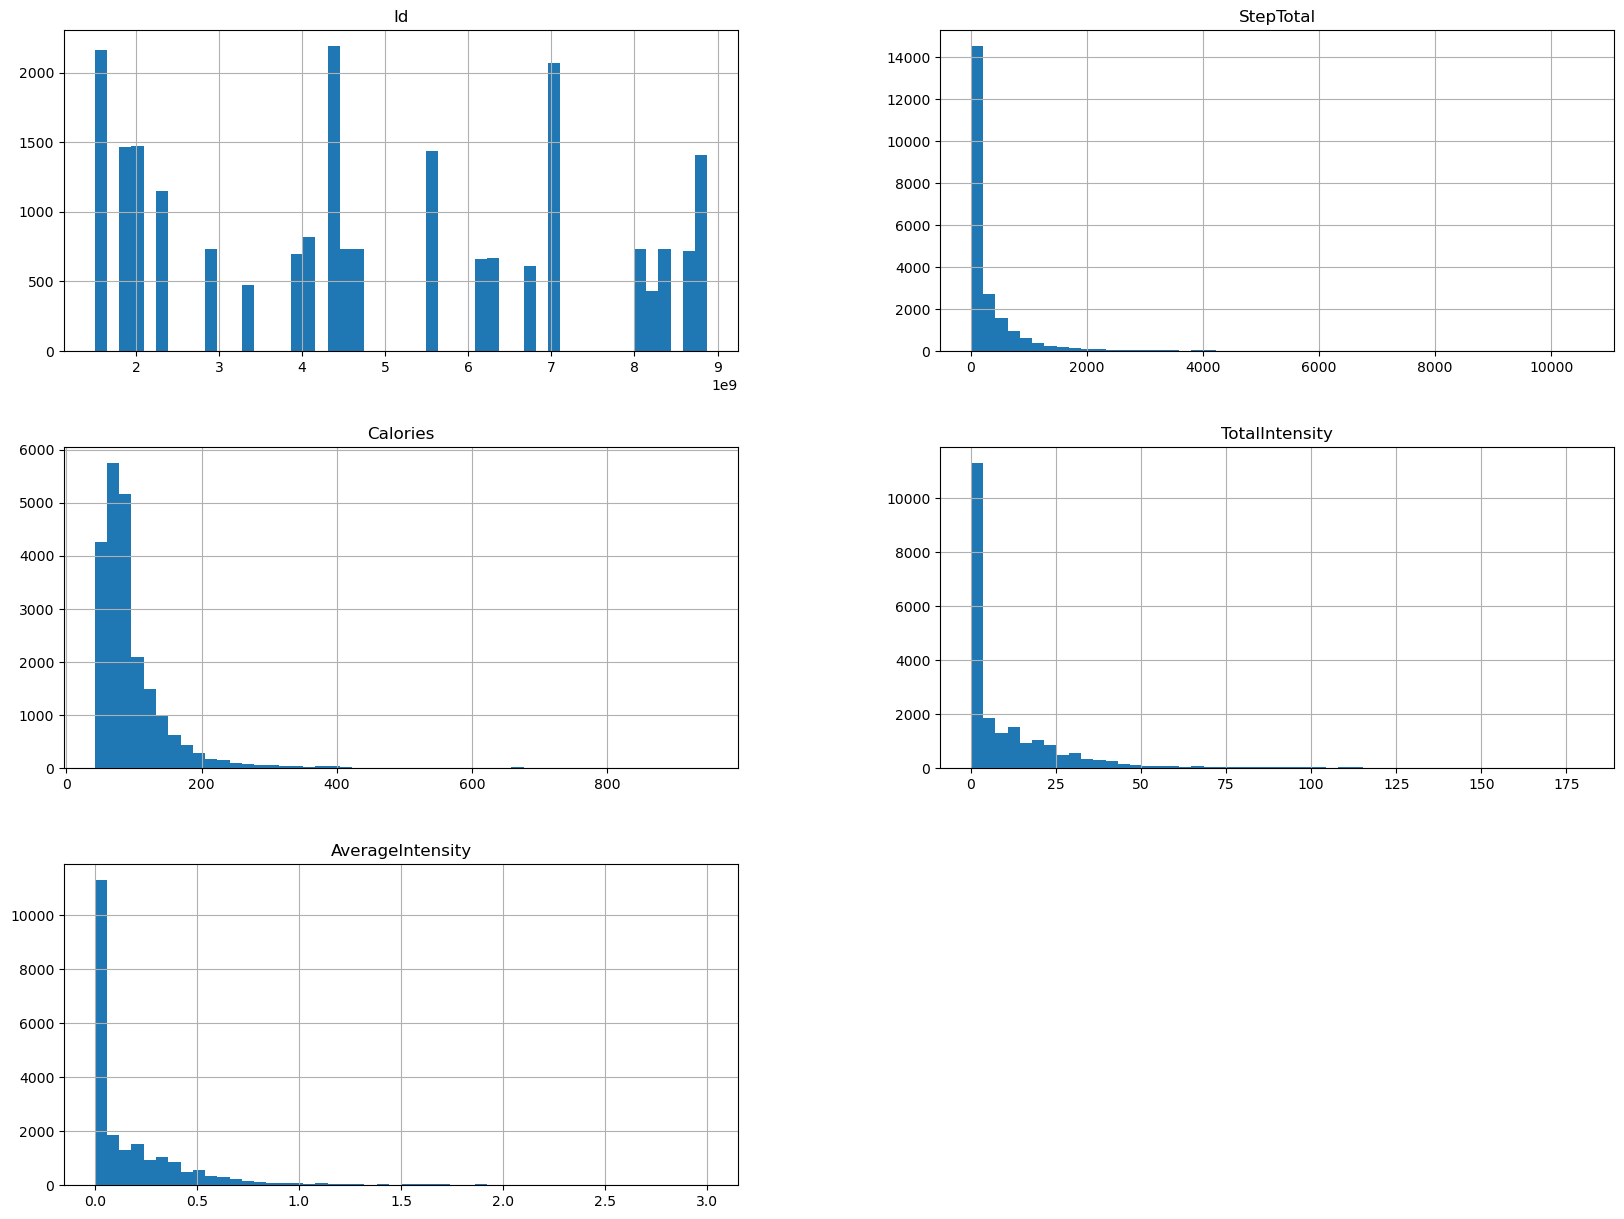

In [26]:
import matplotlib.pyplot as plt

# Histograms for all numerical features
hourly_activity_EDA.hist(bins=50, figsize=(20,15))
plt.show()

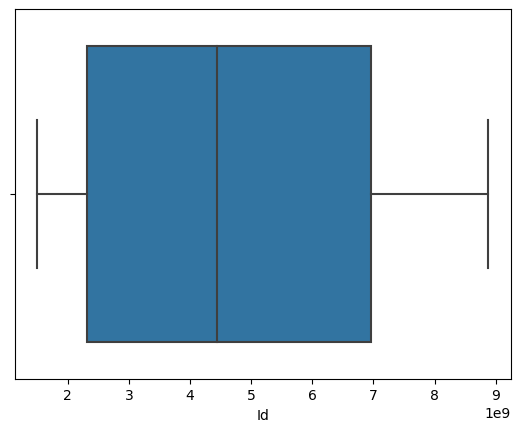

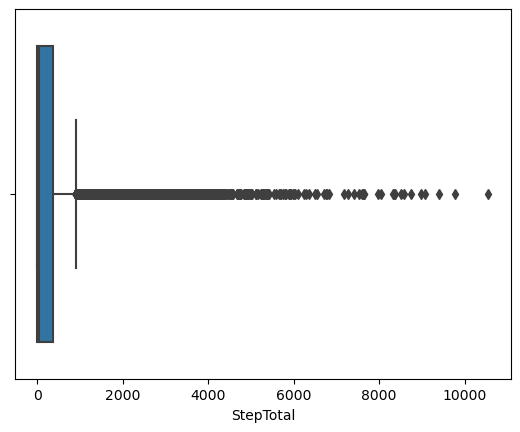

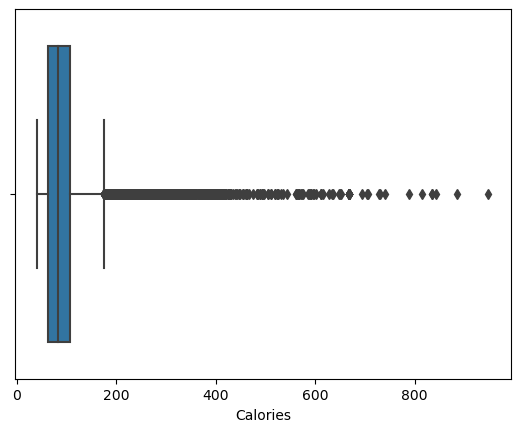

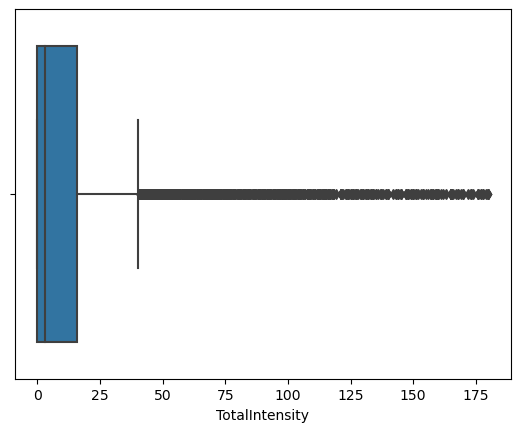

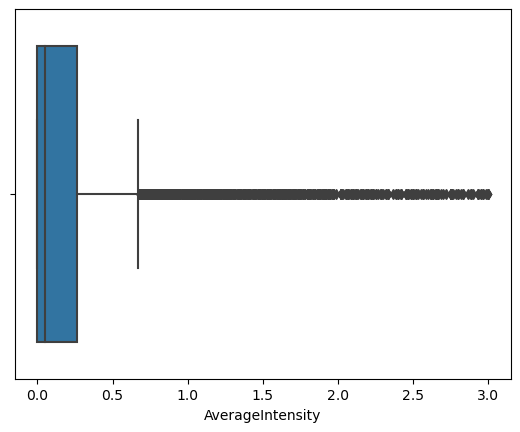

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for all numerical features
for column in hourly_activity_EDA.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=hourly_activity_EDA[column])
    plt.show()


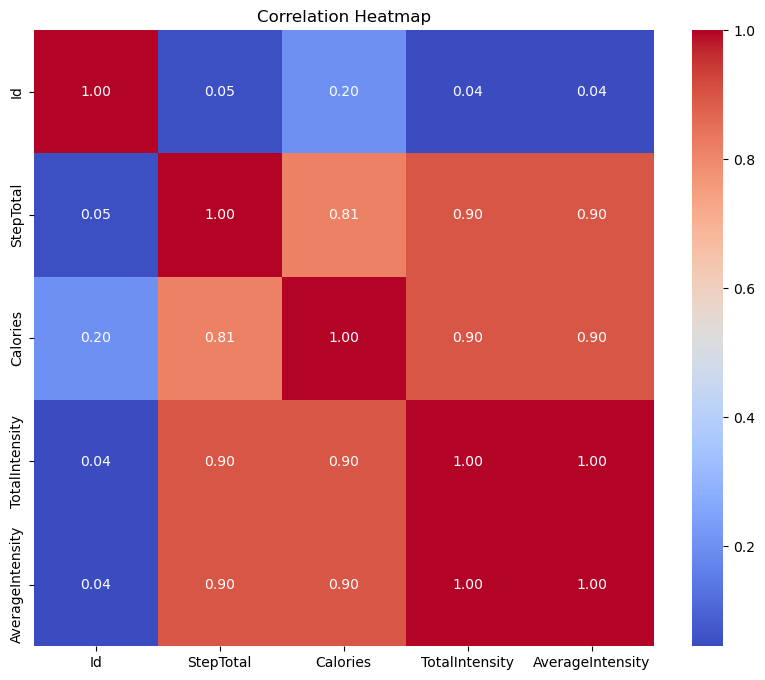

In [28]:
# Calculate the correlation matrix
correlation_matrix = hourly_activity_EDA.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

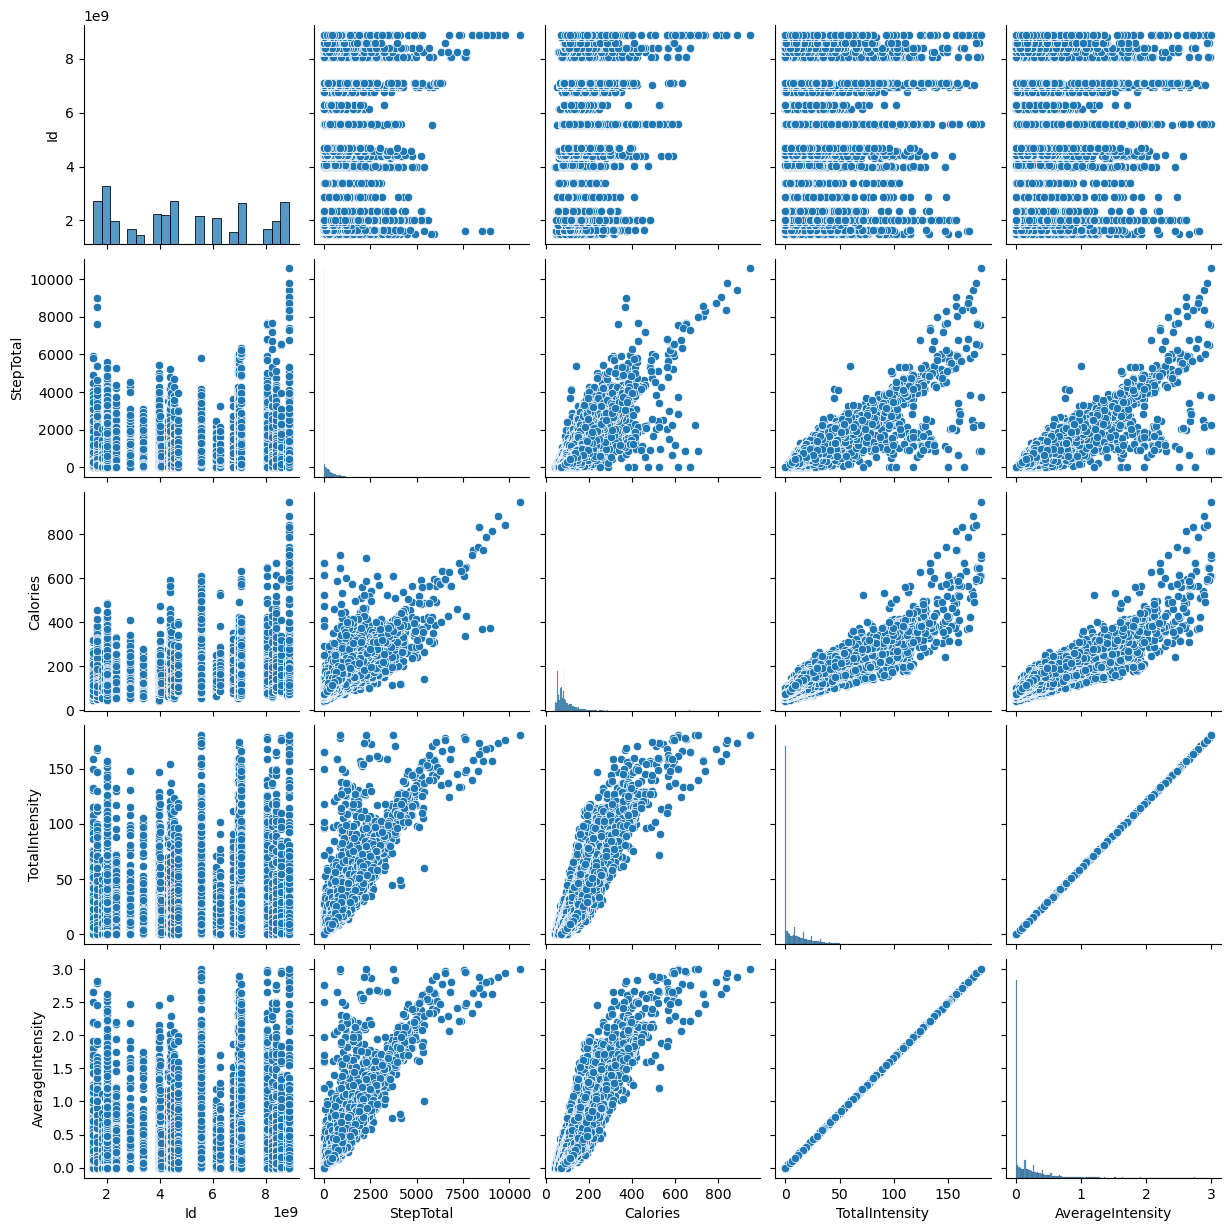

In [29]:
# Pairplot for all numerical features
sns.pairplot(hourly_activity_EDA.select_dtypes(include=['float64', 'int64']))
plt.show()